#Topologia sieci neuronowych

### 1. Import bibliotek

In [ ]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Funkcje aktywacji

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [ ]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [ ]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]


In [ ]:
def sigmoid(y):
  return 1 / (1 + math.exp(-y))
print(sigmoid(y))

0.8807970779778823


In [ ]:
def relu(a):
    return (np.maximum(0,a))
print(relu(a))

0


In [ ]:
def tanh(z):
    return(np.tanh(z))
print(tanh(z))

0.999329299739067


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60000 odnosi się do ilości danych. 28,28 oznacza liczbe pixeli przypadających na jedną cyfre w zadanym zbiorze danych.

#### 3.2. Normalizacja i "spłaszczenie" danych

In [ ]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

In [ ]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'), 
])

#### 3.4. Optymalizator, funkcja straty i metryki

In [ ]:
model.compile(
  optimizer='adadelta',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=50,
  batch_size=20,
)

Epoch 1/50
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0202 - accuracy: 0.9967
Epoch 2/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0194 - accuracy: 0.9969
Epoch 3/50
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0187 - accuracy: 0.9969
Epoch 4/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0180 - accuracy: 0.9970
Epoch 5/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0173 - accuracy: 0.9971
Epoch 6/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0167 - accuracy: 0.9972
Epoch 7/50
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0161 - accuracy: 0.9973
Epoch 8/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0156 - accuracy: 0.9974
Epoch 9/50
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0150 - accuracy: 0.9974
Epoch 10/50
3000/3000 [==============================] - 10s 3ms/step - los

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0355 - accuracy: 0.9882
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0334 - accuracy: 0.9883
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0309 - accuracy: 0.9894
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0305 - accuracy: 0.9900


# Grafika prezentująca architekturę sieci neuronowej:


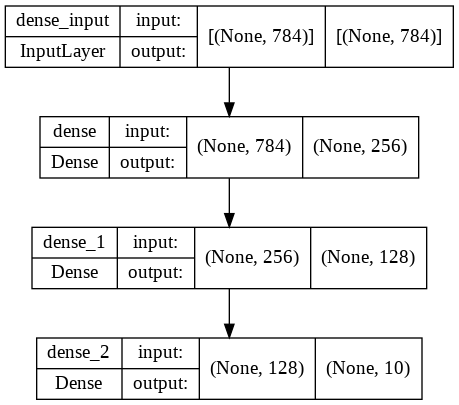

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Zadanie 3**


In [ ]:
def linear(x):
  return x+5


model_x = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'), 
])

model_x.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_x.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

print(model_x.summary())

NameError: ignored

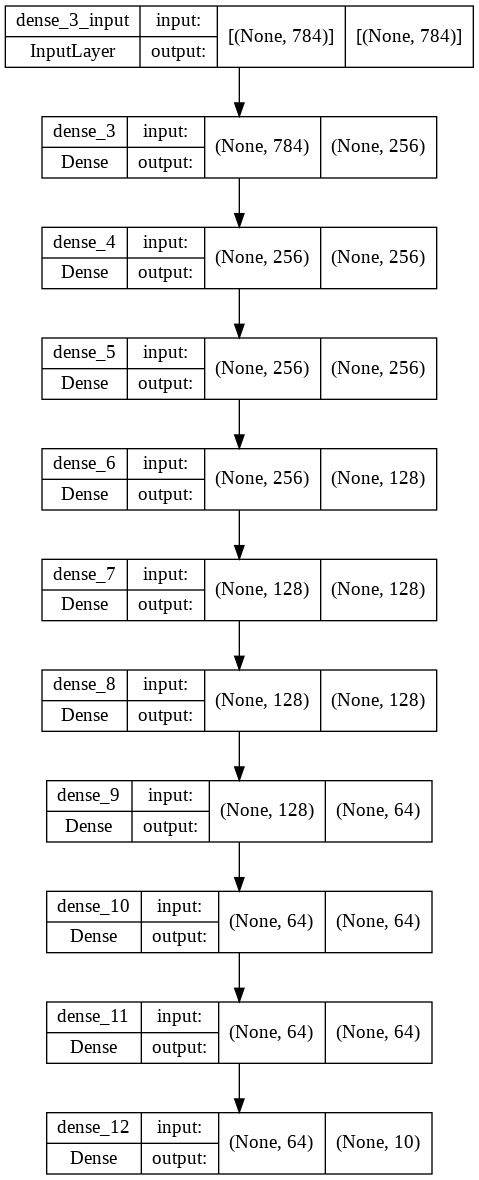

In [ ]:
plot_model(model_x, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model_y.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


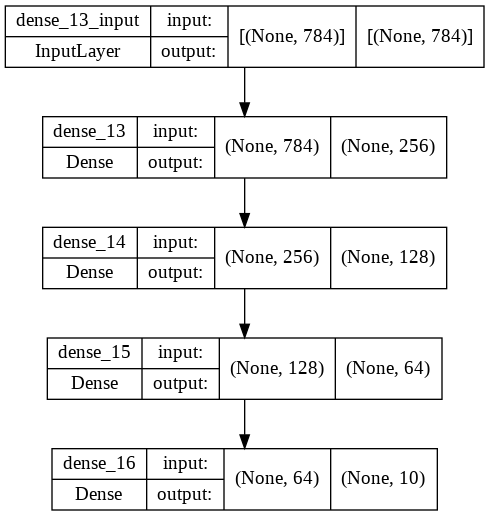

In [ ]:
plot_model(model_y, to_file='model_plot.png', show_shapes=True, show_layer_names=True)